In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
#Importing the necessary libraries
import sys
import pandas as pd
import numpy as np

# Add the src directory to the Python path
sys.path.append('../src')
from data_preprocessing import handle_missing_values, remove_duplicates, correct_data_types, merge_with_ip
from feature_engineering import transaction_frequency, transaction_velocity, time_based_features, scale_data, encode_categorical
from eda import univariate_analysis, bivariate_analysis


In [4]:
credit_data = pd.read_csv('../data/raw/creditcard.csv')
fraud_df = pd.read_csv('../data/raw/fraud_Data.csv')
ip_df = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

## Dataset Overview and Initial Observations

In [5]:
fraud_df.shape

(151112, 11)

In [6]:
fraud_df.dtypes, ip_df.dtypes

(user_id             int64
 signup_time        object
 purchase_time      object
 purchase_value      int64
 device_id          object
 source             object
 browser            object
 sex                object
 age                 int64
 ip_address        float64
 class               int64
 dtype: object,
 lower_bound_ip_address    float64
 upper_bound_ip_address      int64
 country                    object
 dtype: object)

In [7]:
ip_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [8]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [30]:
credit_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data = [credit_data, fraud_df,  ip_df]

for df in data:
    missing_values = df.isnull().sum()
    print(f"Missing Values:\n{missing_values[missing_values > 0]}")

Missing Values:
Series([], dtype: int64)
Missing Values:
Series([], dtype: int64)
Missing Values:
Series([], dtype: int64)


In [10]:
# Step 1: Data Preprocessing
# Handle missing values by dropping rows with missing values
fraud_df = handle_missing_values(fraud_df, strategy='drop')


### **1️⃣ Handling Missing Values**  
- Checked for missing values in all datasets.  
- Imputed or dropped missing values based on relevance.

In [11]:

# Remove duplicate rows
fraud_df = remove_duplicates(fraud_df)


In [12]:

# Correct data types (convert transaction_time to datetime)
fraud_df = correct_data_types(fraud_df)


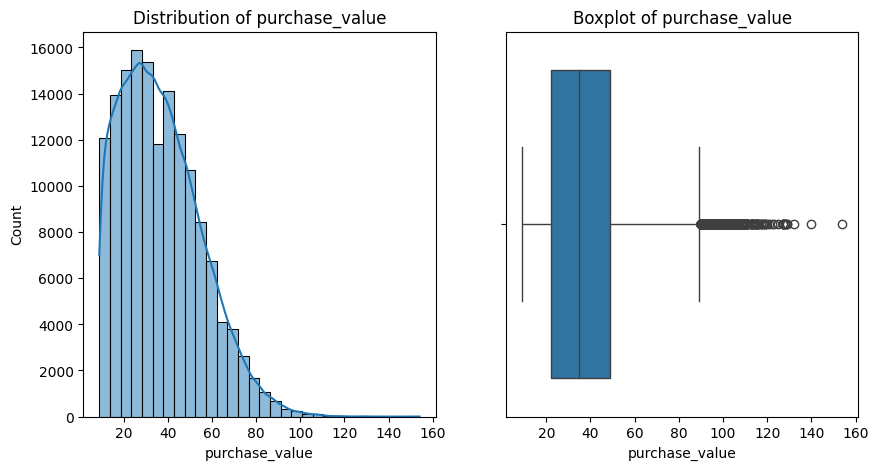

In [13]:

univariate_analysis(fraud_df, 'purchase_value')


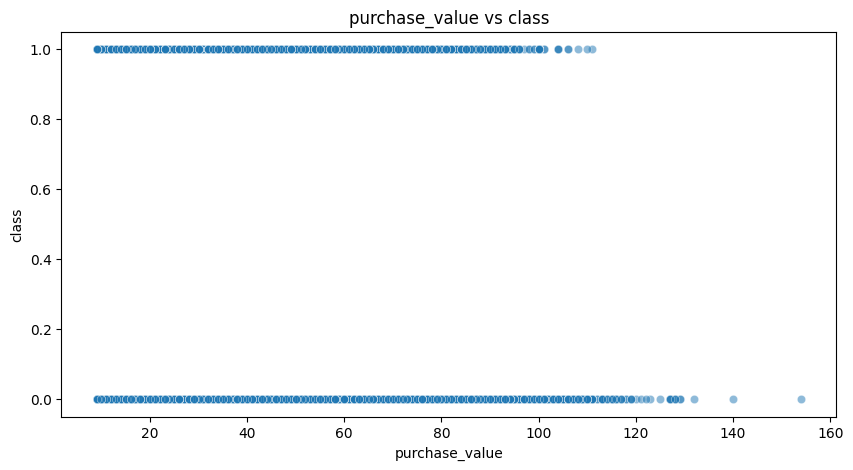

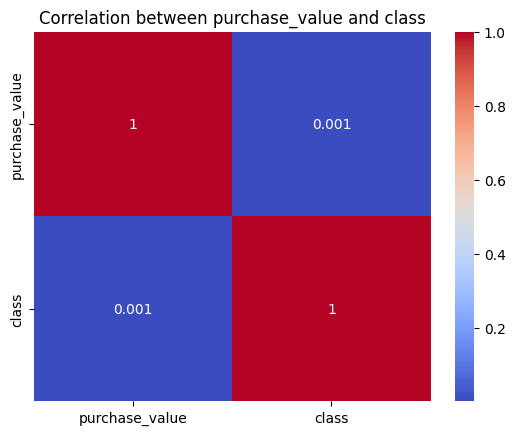

In [14]:

bivariate_analysis(fraud_df, 'purchase_value', 'class')

In [15]:

# Merge fraud data with IP address data to add geolocation info
fraud_df = merge_with_ip(fraud_df, ip_df)


**4️⃣ Merging Datasets for Geolocation Analysis**  
- Converted `ip_address` column to integer format for merging.  
- Merged `Fraud_Data.csv` with `IpAddress_to_Country.csv` to obtain country details for transactions.  

In [16]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,NaN
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,NaN
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,NaN
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,NaN


In [17]:

# Step 2: Feature Engineering
# Calculate transaction frequency
fraud_df = transaction_frequency(fraud_df)


In [58]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,NaN,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,NaN,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,NaN,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,NaN,1


In [18]:

# Calculate transaction velocity
fraud_df = transaction_velocity(fraud_df)


In [60]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,days_since_signup,transaction_velocity
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,NaN,1,53,0.018868
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,NaN,1,1,1.000000
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,NaN,1,1,1.000000
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,6,0.166667
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,NaN,1,51,0.019608


In [19]:

# Create time-based features
fraud_df = time_based_features(fraud_df)


In [62]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,days_since_signup,transaction_velocity,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,NaN,1,53,0.018868,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,NaN,1,1,1.000000,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,NaN,1,1,1.000000,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,6,0.166667,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,NaN,1,51,0.019608,18,2


In [21]:

# Normalize and Scale features
fraud_df = scale_data(fraud_df, ['purchase_value', 'transaction_frequency'])


In [22]:

# Encode categorical features
fraud_df = encode_categorical(fraud_df, ['source', 'browser', 'sex', 'country'])


In [23]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,days_since_signup,transaction_velocity,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,QVPSPJUOCKZAR,2,0,1,39,7.327584e+08,0,0,0.0,53,0.018868,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,EOGFQPIZPYXFZ,0,0,0,53,3.503114e+08,0,0,0.0,1,1.000000,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,YSSKYOSJHPPLJ,2,3,1,53,2.621474e+09,1,0,0.0,1,1.000000,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,ATGTXKYKUDUQN,2,4,1,41,3.840542e+09,0,0,0.0,6,0.166667,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,NAUITBZFJKHWW,0,4,1,45,4.155831e+08,0,0,0.0,51,0.019608,18,2


### **5️⃣ Feature Engineering**  
- **Transaction Frequency & Velocity**: Created features based on user transaction history.  
- **Time-Based Features**: Extracted:
  - `hour_of_day` from `purchase_time`.  
  - `day_of_week` from `purchase_time`.  

### **6️⃣ Normalization and Scaling**  
- Scaled numerical features (`purchase_value`, `age`, etc.) using **MinMaxScaler**.  
- Applied **StandardScaler** for models that assume normal distribution.  

### **7️⃣ Encoding Categorical Features**  
- One-hot encoded categorical variables: `source`, `browser`, `sex`, `country`.  

In [25]:
# Save Processed Data
fraud_df.to_csv("../data/processed/fraud_data_processed.csv", index=False)